# <font color=Blue>**Machine Learning Assignment 2024**</center></font>

# **Assignment 6**

 **Breast Cancer Dataset** :

Perform the following Classification models and find the best model after optimizing(hyper parameter tuning) and choose metrics accuracy, precision, recall, F1 score, or ROC-AUC.
Naive Bayes, Decision trees, Random forest, KNN, SVM

Perform basic data prep for the above to proceed Logistic regression and report the summary with appropriate metrics.

  https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
# <font color=Blue> Team 1 </center></font>
Swetha Mallikarjunaiah

Neenu Nair

Dhanya Mohanan

Shishira Srinivas

Yogalakshmi Kanagavel

---


**<h3>Table of Content</h3>**
- [x] About Breast Cancer  Dataset
- [x] Initial Exploration
- [x] Data cleaning (Handle nulls, Data type , Outliers and Anomalies)
- [x] Univariate,bivariate and multivariate Analysis
- [x] Feature Engineering
- [x] Modelling
- [x] Best Model Analysis
- [x] Conclusion
- [x] Reference

# <font color=Orange>**About Breast Cancer Dataset**</center></font>

**Breast cancer** is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.


**How to use this dataset**

The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign(non-cancerous).

**Features:**

**Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.**     


**ID number:** Unique identifier for each instance in the dataset.

**Mean radius**: Mean of distances from the center to points on the perimeter.

**Mean texture:** Mean of gray-scale values for pixels in the image.

**Mean perimeter: **Mean size of the core tumor.

**Mean area:** Mean area of the tumor.

**Mean smoothness:** Mean of local variation in radius lengths.

**Mean compactness:** Mean of perimeter^2 / area - 1.0.

**Mean concavity:** Mean severity of concave portions of the contour.

**Mean concave points:** Mean number of concave portions of the contour.

**Mean symmetry:** Mean symmetry of the tumor.

**Mean fractal dimension:** Mean fractal dimension of the tumor.

 The features from 13 to 32 have similar interpretations but are related to the standard error and "worst" values (largest mean value) for various properties.

 These features collectively provide a comprehensive set of measurements characterizing different aspects of cell nuclei in breast cancer biopsies.

**Target Variable:**

**Diagnosis:**The target variable indicating whether a tumor is malignant (M) or benign (B).

"malignant" and "benign" are terms used to describe the nature of a tumor or growth. Here are their definitions:

**Malignant (M):** A malignant tumor is cancerous. It is composed of cells that can invade nearby tissues and spread to other parts of the body. Malignant tumors are considered more dangerous as they have the potential to be life-threatening and can lead to the spread of cancer (metastasis).

**Benign (B):** A benign tumor is non-cancerous. It is typically localized, meaning it does not invade nearby tissues or spread to other parts of the body. While benign tumors are generally not as harmful as malignant ones, they can still cause problems depending on their size and location. They are usually considered less dangerous and are not associated with the same level of health risks as malignant tumors.

# <font color=Orange>**Initial Exploration**</center></font>

# Importing Data and Libraries

In [ ]:
# Importing the Pandas library with the alias 'pd'
import pandas as pd

from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score
plt.style.use ("dark_background")

# Import dataset by Features and Target

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [ ]:
feature_df = pd.DataFrame(data = data['data'], columns = data['feature_names'])

In [ ]:
#df is the dataframe that has both feature and target columns
bc_df = pd.DataFrame(data=data['data'], columns=data['feature_names'])
bc_df['diagnosis'] = data['target']

display(bc_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


 **shape:**<font color=Blue> Shape attribute returns the number of columns and rows in the dataset(This dataset contains 569 rows and 32 columns)</center></font>

In [ ]:
bc_df.shape

(569, 31)

**columns:**<font color=Blue> Checking the columns in the dataset</center></font>

In [ ]:
Columns =bc_df.columns
print(Columns)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')


**head(n) :**<font color=Blue> Return first n records from the dataset </center></font>

In [ ]:
bc_df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


**sample() :**<font color=Blue> The sample function in pandas is used to randomly sample a fraction of a DataFrame. When you use sample(frac=0.5), it means you want to randomly select 50% of the rows from the DataFrame.</center></font>

In [ ]:
bc_df.sample(frac=0.5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
392,15.490,19.97,102.40,744.7,0.11600,0.15620,0.18910,0.09113,0.1929,0.06744,...,29.41,142.10,1359.0,0.1681,0.39130,0.55530,0.21210,0.3187,0.10190,0
535,20.550,20.86,137.80,1308.0,0.10460,0.17390,0.20850,0.13220,0.2127,0.06251,...,25.48,160.20,1809.0,0.1268,0.31350,0.44330,0.21480,0.3077,0.07569,0
227,15.000,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.03780,0.1881,0.05907,...,19.31,114.20,808.2,0.1136,0.36270,0.34020,0.13790,0.2954,0.08362,1
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.1873,0.59170,0.90340,0.19640,0.3245,0.11980,0
542,14.740,25.42,94.70,668.6,0.08275,0.07214,0.04105,0.03027,0.1840,0.05680,...,32.29,107.40,826.4,0.1060,0.13760,0.16110,0.10950,0.2722,0.06956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,15.080,25.74,98.00,716.6,0.10240,0.09769,0.12350,0.06553,0.1647,0.06464,...,33.22,121.20,1050.0,0.1660,0.23560,0.40290,0.15260,0.2654,0.09438,0
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,29.25,108.40,808.9,0.1306,0.19760,0.33490,0.12250,0.3020,0.06846,0
364,13.400,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,0.1650,0.05701,...,21.70,93.76,663.5,0.1213,0.16760,0.13640,0.06987,0.2741,0.07582,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.1103,0.08298,0.07993,0.02564,0.2435,0.07393,1


 **info():**<font color=Blue> Display concise summary information about the DataFrame</center></font>

In [ ]:
bc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**describe():**<font color=Blue> In Pandas, the describe() function is used to generate descriptive statistics of a DataFrame or Series. It provides a summary of the central tendency, dispersion, and shape of the distribution of the data. The information returned includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum. </center></font>

In [ ]:
bc_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# <font color=Orange>**Data Cleaning**</center></font>

**columns:**<font color=Blue> Checking the columns in the dataset</center></font>

In [ ]:
bc_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

**format:**<font color=Blue> In Pandas, the format() method is used for formatting the display of DataFrame or Series. This method allows you to specify the format for the values in the DataFrame or Series when it is displayed. It provides a flexible way to control the formatting of numerical values, such as controlling the number of decimal places or adding thousands separators.</center></font>

In [ ]:
for col in bc_df.columns:
    var1 = ('{} : {}'.format(col,bc_df[col].unique()))
    print(var1)


mean radius : [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.44  13.74
  8.

**unique():**<font color=Blue> In Pandas, the unique() function is used to get the unique elements in a Series. If you apply it to a DataFrame, it will return an array containing unique values across all columns. </center></font>

## Data cleaning steps




In [ ]:
bc_df['diagnosis'].unique()

array([0, 1])

**Dropping duplicates**

**duplicated().sum():**<font color=Blue>In Pandas, the duplicated() function is used to identify duplicate rows in a DataFrame. When followed by sum(), it counts the number of duplicated rows. </center></font>

In [ ]:
# Using the `duplicated` method to identify duplicate rows in the DataFrame `df`.
# By default, it checks for duplicates across all columns and marks duplicates as True for all except the first occurrence.

duplicates = bc_df.duplicated()
duplicated_rows = duplicates.sum()
print("Duplicated rows=",duplicated_rows)
# The resulting `duplicates` is a Boolean Series with True indicating duplicate rows.
print("0 duplicated rows")

Duplicated rows= 0
0 duplicated rows


**drop_duplicates():**<font color=Blue>If you want to drop the duplicated rows or keep only the first occurrence of each duplicated row, you can use drop_duplicates() </center></font>

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5    "> Observation: </h3>

**No Duplicate rows and no duplicate rows removal**

**Data type verification**


 **dtype:**<font color=Blue>If you want to drop the duplicated rows or keep only the first occurrence of each duplicated row, you can use drop_duplicates() </center></font>

In [ ]:
# Print columns and their data types
for column, dtype in bc_df.dtypes.items():
    print(f"{column}: {dtype}")

mean radius: float64
mean texture: float64
mean perimeter: float64
mean area: float64
mean smoothness: float64
mean compactness: float64
mean concavity: float64
mean concave points: float64
mean symmetry: float64
mean fractal dimension: float64
radius error: float64
texture error: float64
perimeter error: float64
area error: float64
smoothness error: float64
compactness error: float64
concavity error: float64
concave points error: float64
symmetry error: float64
fractal dimension error: float64
worst radius: float64
worst texture: float64
worst perimeter: float64
worst area: float64
worst smoothness: float64
worst compactness: float64
worst concavity: float64
worst concave points: float64
worst symmetry: float64
worst fractal dimension: float64
diagnosis: int64


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5    "> Observation: </h3>

**No Datatype conversion needed**



**Label encoding  'Diagnosis' variable**

 **value_counts():**<font color=Blue>In Pandas, the value_counts() function is used to count the occurrences of unique values in a Series. </center></font>

In [ ]:
bc_df['diagnosis'].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

In [ ]:
bc_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

**Imputing missing values**

 **isnull().sum():**<font color=Blue> This function is used to count the number of missing (null or NaN) values in each column of a DataFrame.</center></font>

In [ ]:
bc_df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

In [ ]:
# Calculating the number of unique values for each column in the DataFrame 'bc_df'
n_unique = bc_df.nunique()
n_unique

# 'nunique()' is a Pandas DataFrame method that returns the number of unique values for each column.
# The result, stored in the variable 'n_unique', provides insights into the diversity of values in each column.

mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
diagnosis                    2
dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5    "> Observation: </h3>

**No missing values**

# <font color=Orange>**Univariate,bivariate and multivariate Analysis**</center></font>

<Axes: xlabel='diagnosis', ylabel='Count'>

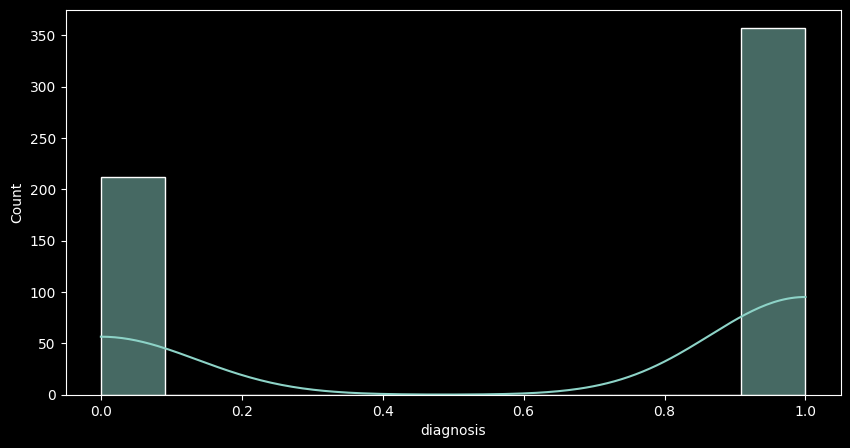

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=bc_df['diagnosis'],kde=True,palette='hot')

In [ ]:
plt.figure(figsize=(15, 12))
corr = bc_df.corr()
corr

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


<Figure size 1500x1200 with 0 Axes>

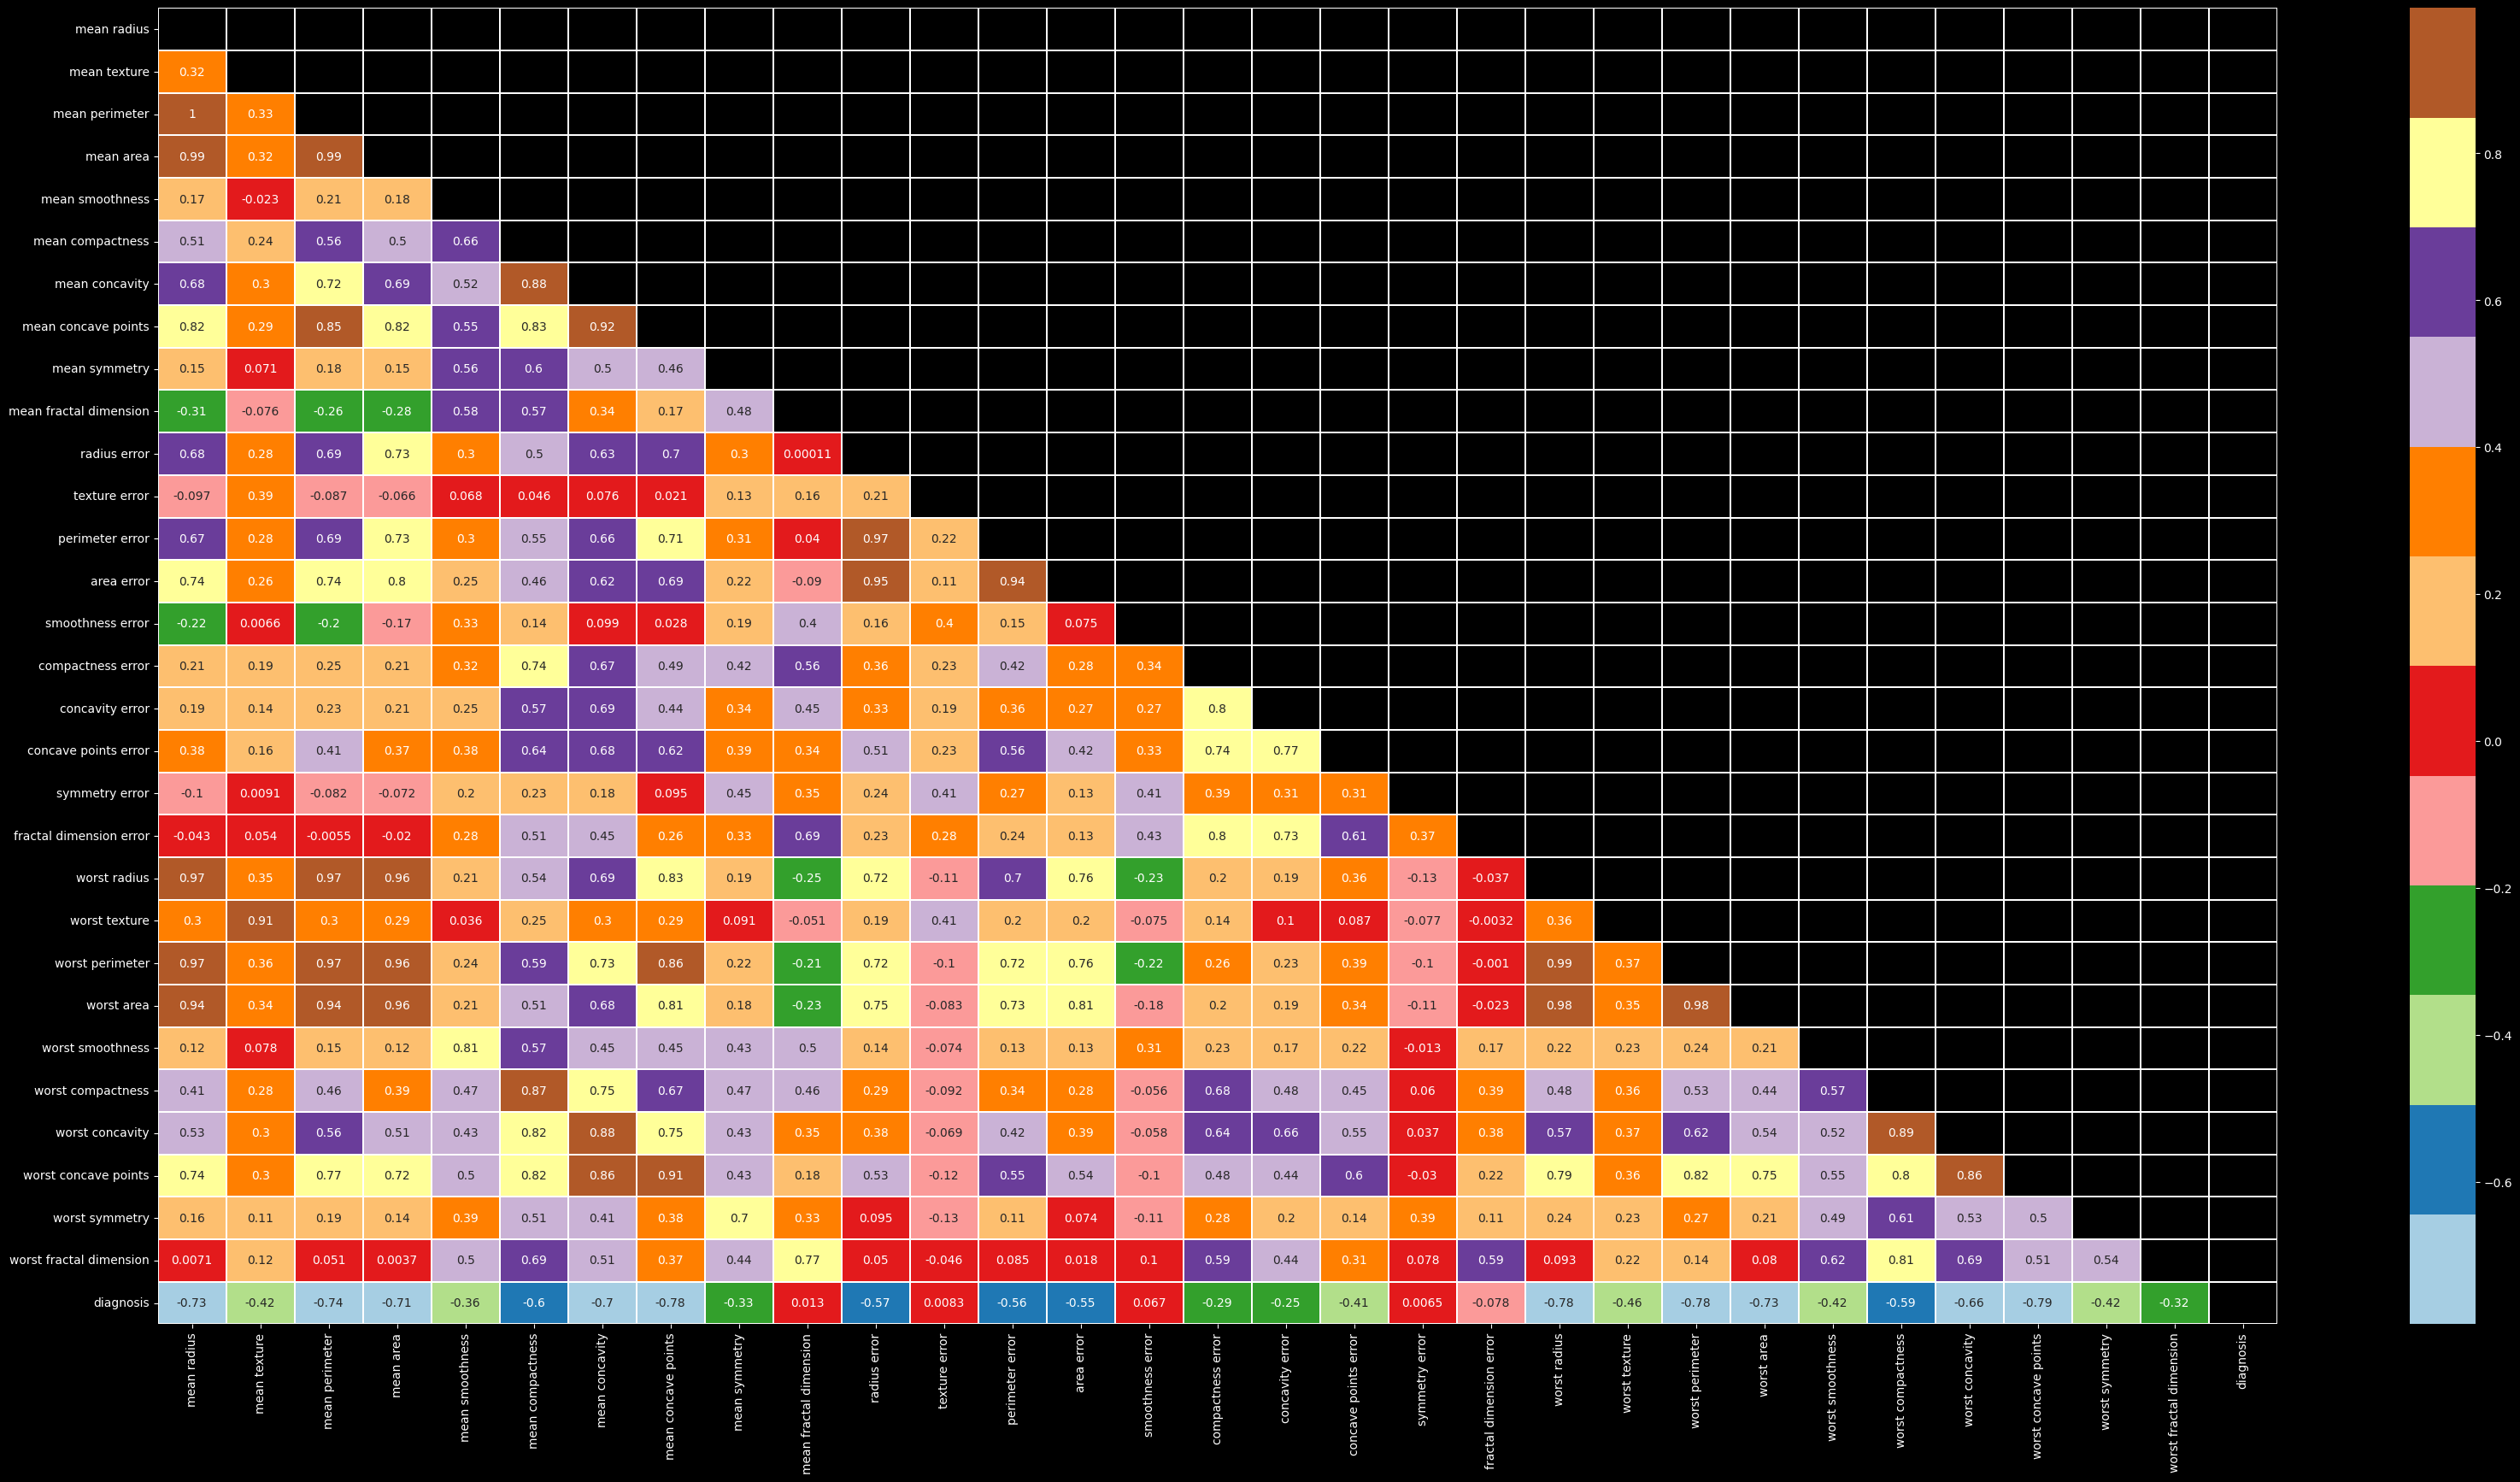

In [ ]:
# Creating a new matplotlib figure with a specified size of 40x20 inches
plt.figure(figsize=(40, 20))

# Generating an upper triangular matrix from the correlation matrix of bc_df
matrix = np.triu(bc_df.corr())

# Creating a heatmap using Seaborn to visualize the correlation matrix of bc_df
# Annotating the heatmap with correlation values
# Setting linewidth to 0.10 for better visibility of cell boundaries
# Applying a mask to hide the lower triangular part of the heatmap using the generated upper triangular matrix
# Using the "Paired" colormap for better color representation
sns.heatmap(bc_df.corr(), annot=True, linewidth=.10, mask=matrix, cmap="Paired");


<Axes: xlabel='mean radius'>

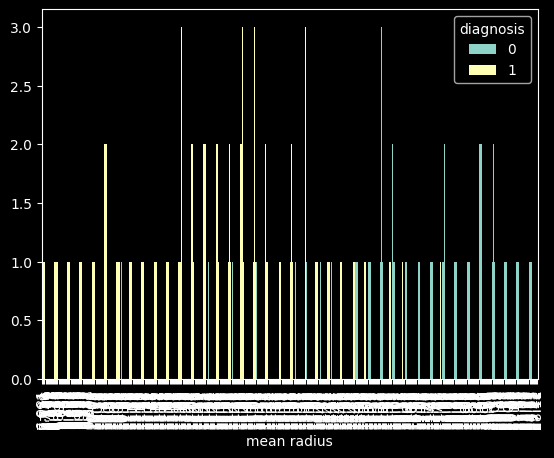

In [ ]:
#cheacking distribution of mean radius according to tumor type
tumor_radius = pd.crosstab(bc_df['mean radius'],bc_df['diagnosis'])
tumor_radius.plot(kind='bar')

In [ ]:
#numeric columns
num_col=[]
for i in bc_df.columns:
    if bc_df[i].dtype=='float64':
        num_col.append(i)

num_col

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

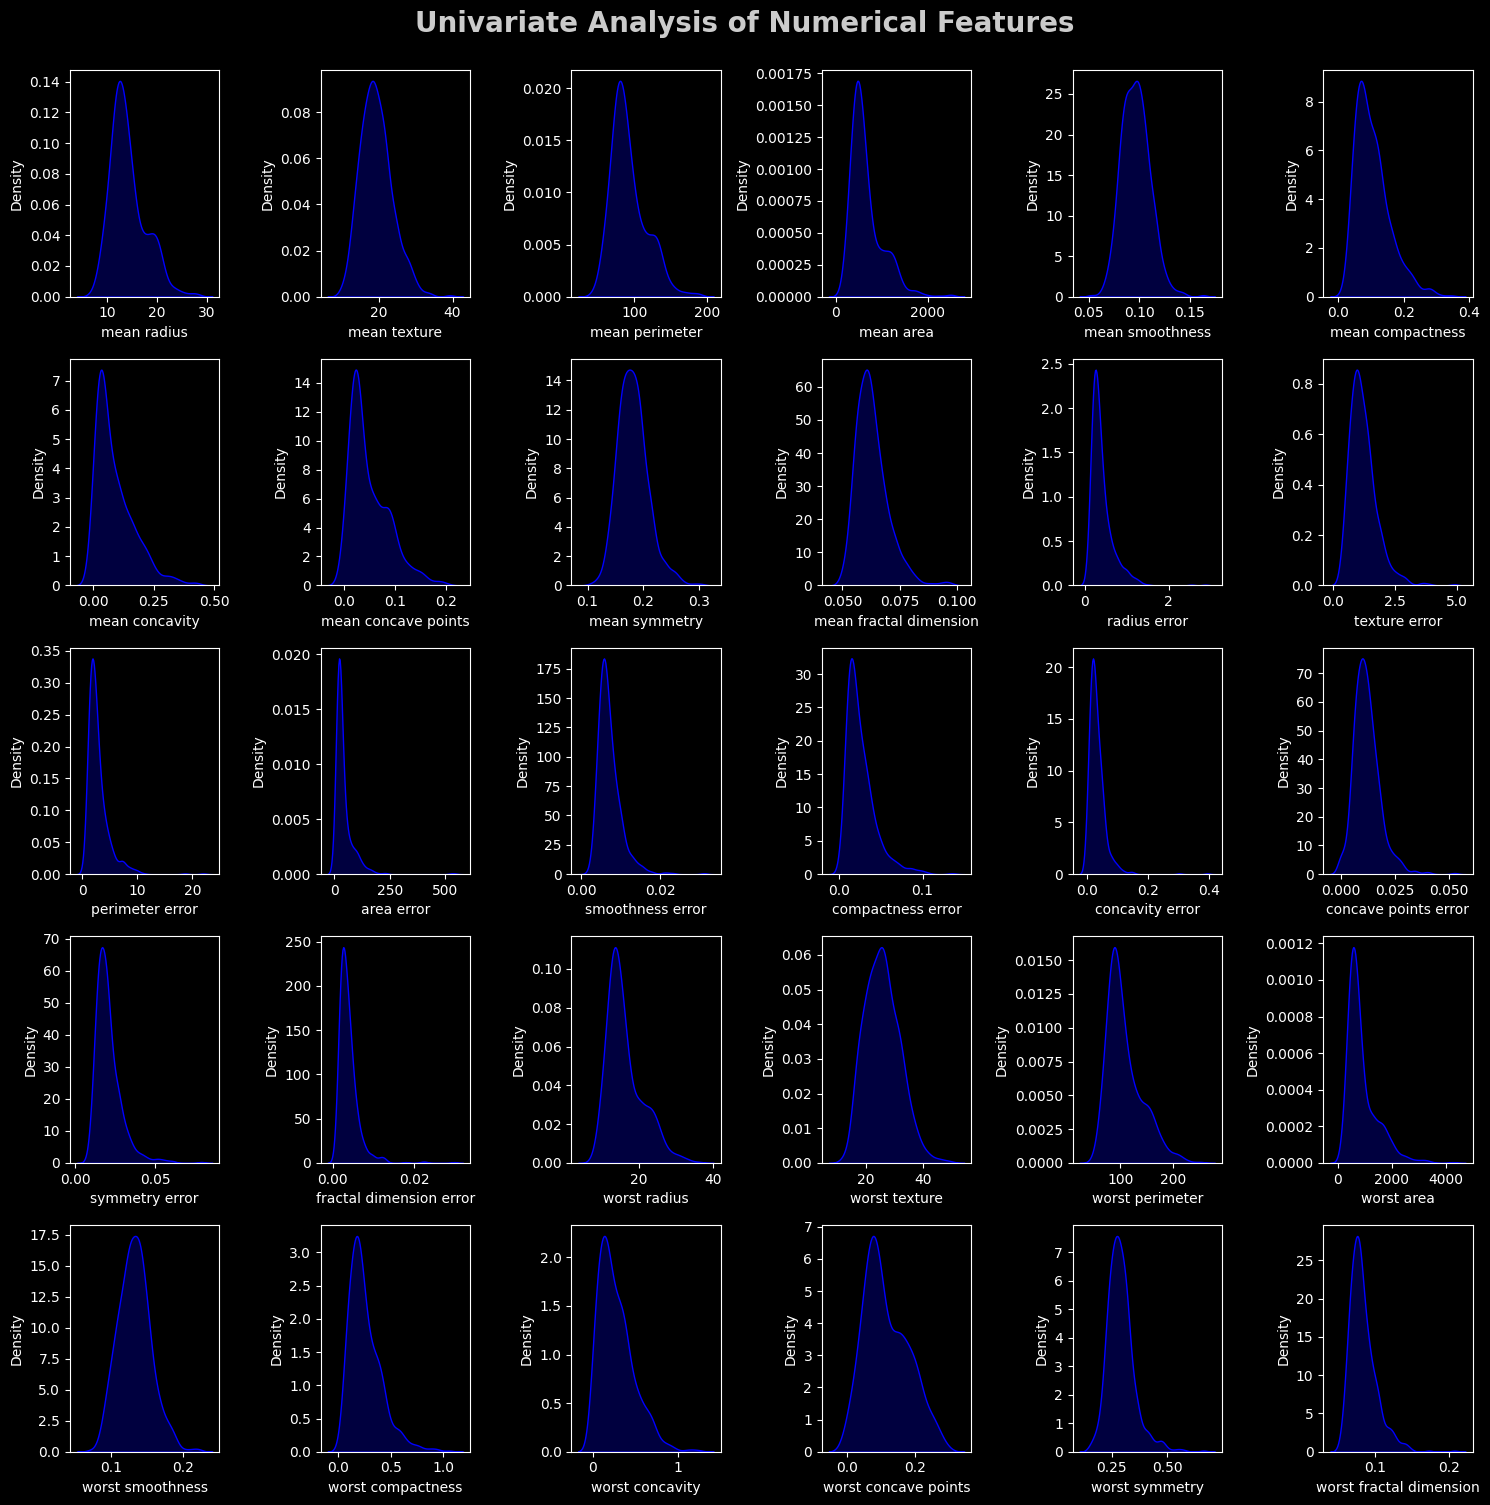

In [ ]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_col)):
    plt.subplot(5, 6, i+1)
    sns.kdeplot(x=bc_df[num_col[i]],shade=True, color='b')
    plt.xlabel(num_col[i])
    plt.tight_layout()

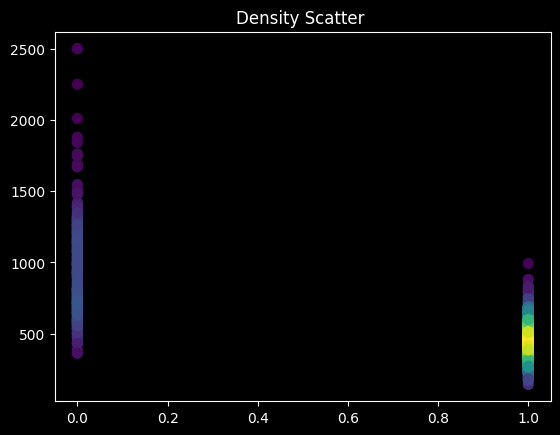

In [ ]:
from scipy.stats import gaussian_kde

x =bc_df["diagnosis"]
y = bc_df["mean area"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=50)
plt.title('Density Scatter ')
plt.show()

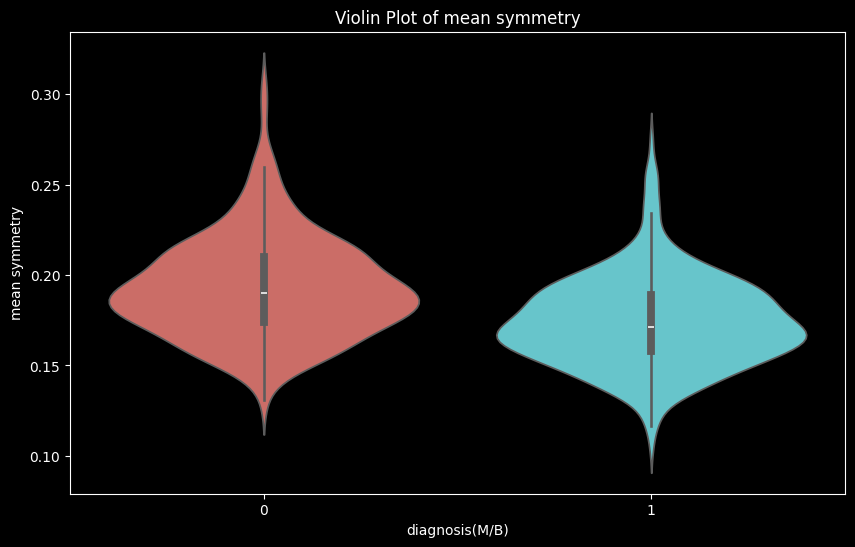

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x="diagnosis", y="mean symmetry",data=bc_df, palette="hls")
plt.title("Violin Plot of mean symmetry")
plt.xlabel("diagnosis(M/B)")
plt.ylabel("mean symmetry")
plt.show()

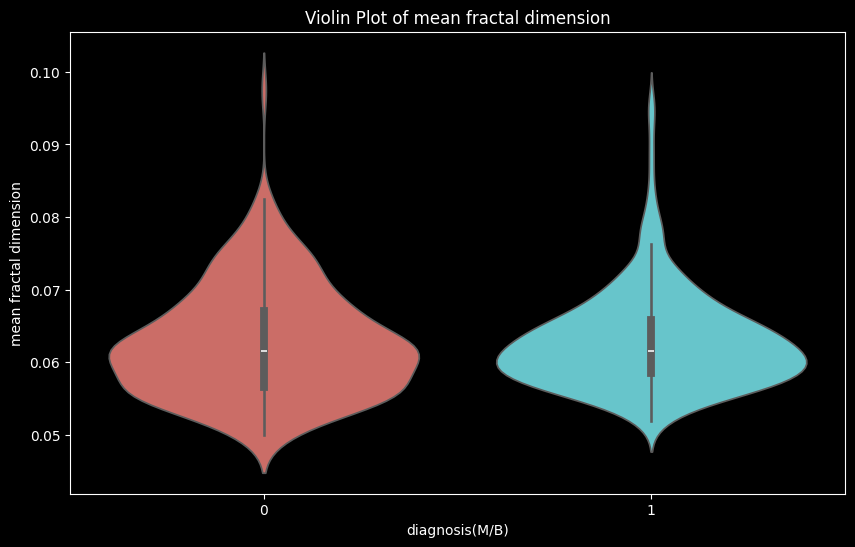

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(x="diagnosis", y="mean fractal dimension",data=bc_df, palette="hls")
plt.title("Violin Plot of mean fractal dimension")
plt.xlabel("diagnosis(M/B)")
plt.ylabel("mean fractal dimension")
plt.show()

**Outlier Detection using Boxplot**

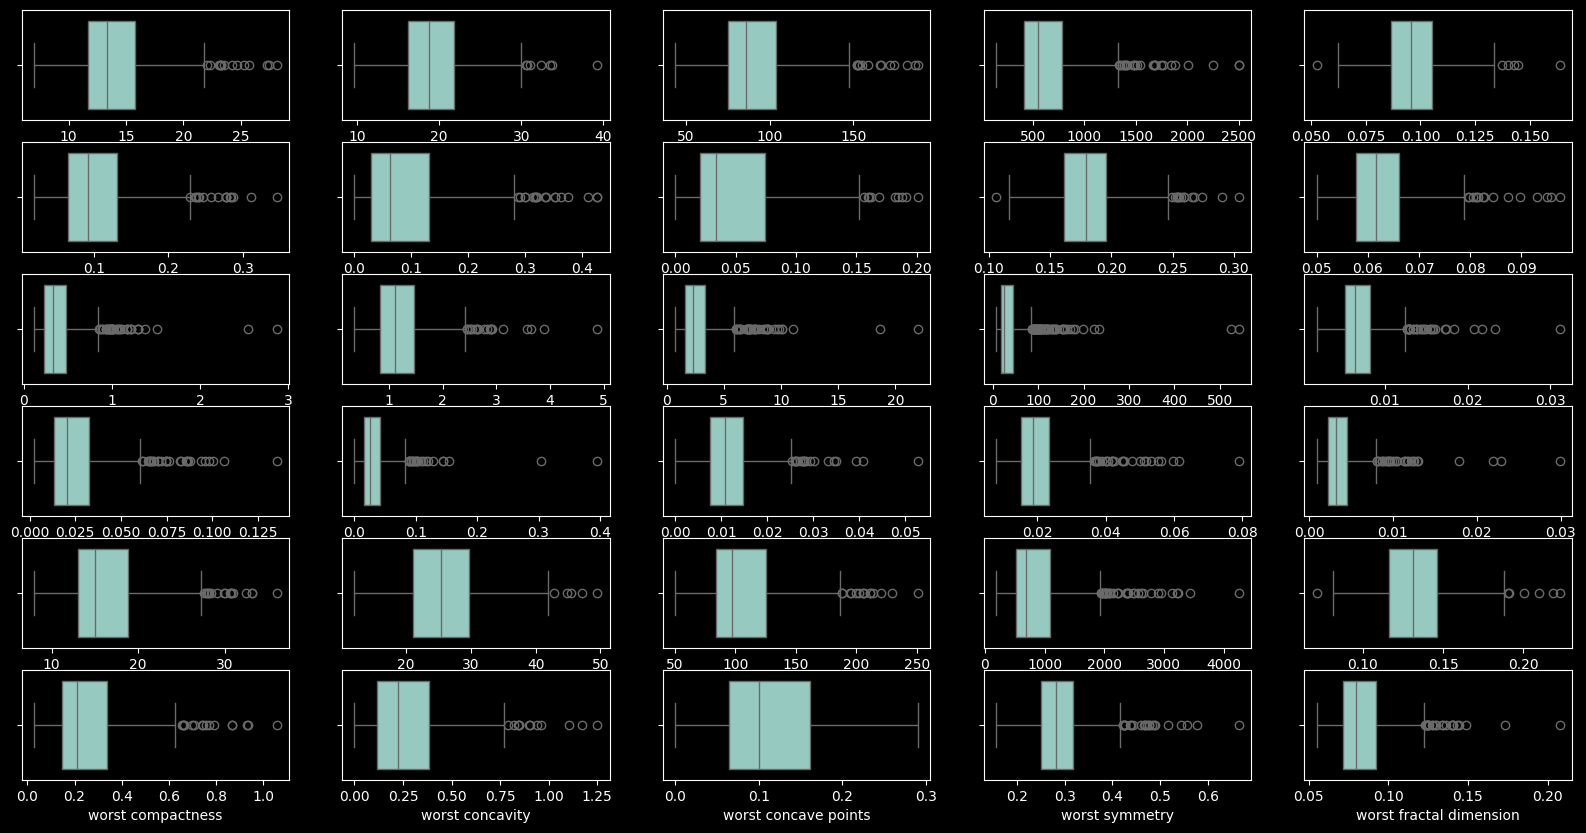

In [ ]:
index=0
plt.figure(figsize=(20,10))
for feature in bc_df.select_dtypes('float64').columns:
    index+=1
    plt.subplot(6,5,index)
    sns.boxplot(x=feature,data=bc_df,whis=1.5)

# **OUTLIER HANDLING**

**According to this boxplot, there are many outliers larger than the upper limits. By increasing the whisker, we can include some of these outliers in the analysis.**

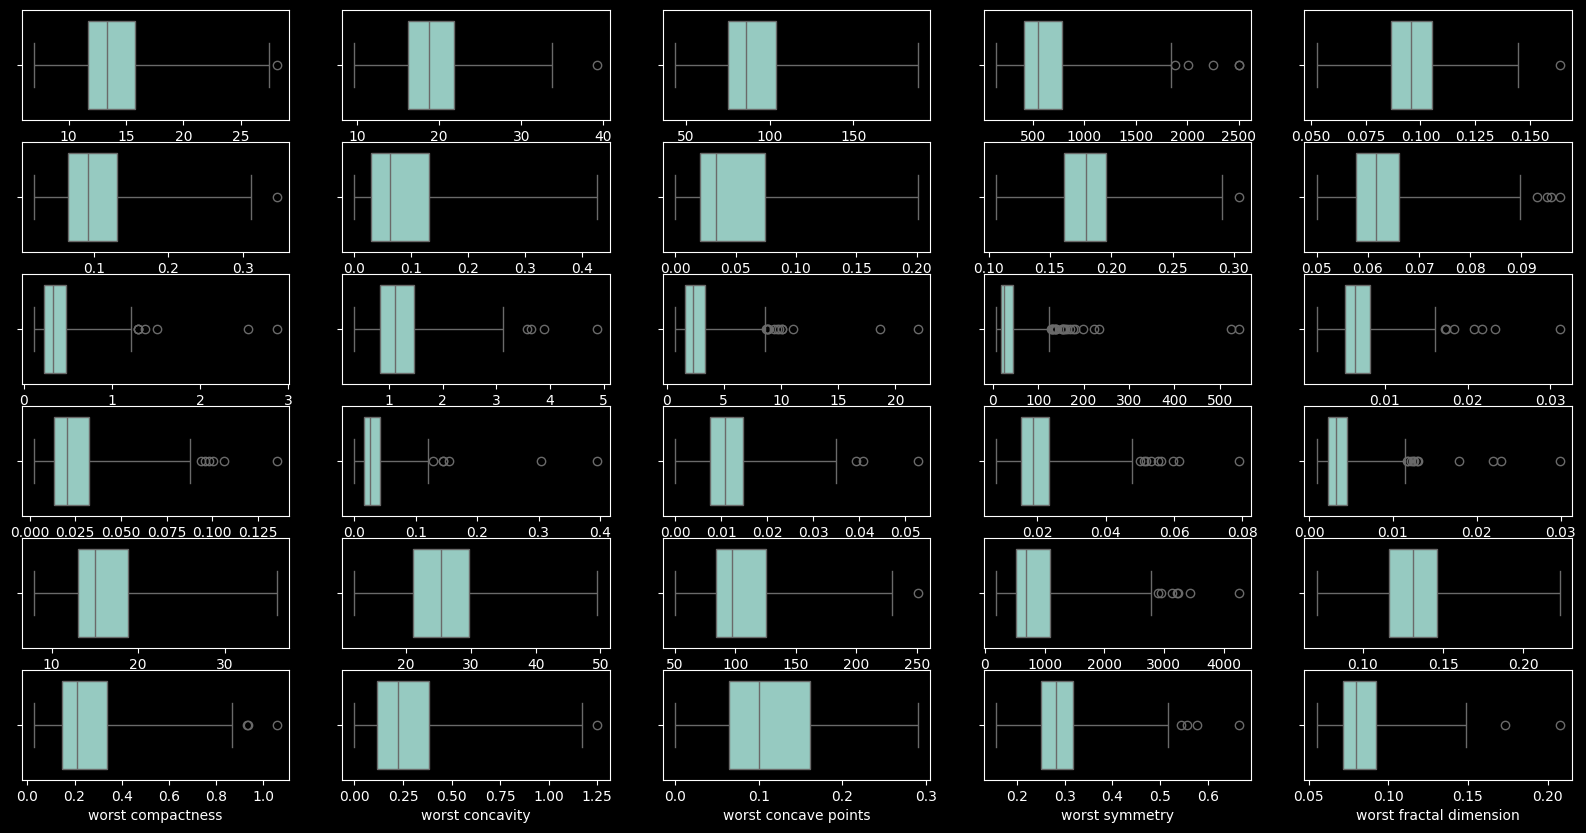

In [ ]:
index=0
plt.figure(figsize=(20,10))
for feature in bc_df.select_dtypes('float64').columns:
    index+=1
    plt.subplot(6,5,index)
    sns.boxplot(x=feature,data=bc_df,whis=3) # When whisker is increased, the number of outliers decreases.

# <font color=Orange>**Feature Engineering**</center></font>

In [ ]:
#to find the skewness of data
skewness = bc_df.skew()
print(skewness)

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

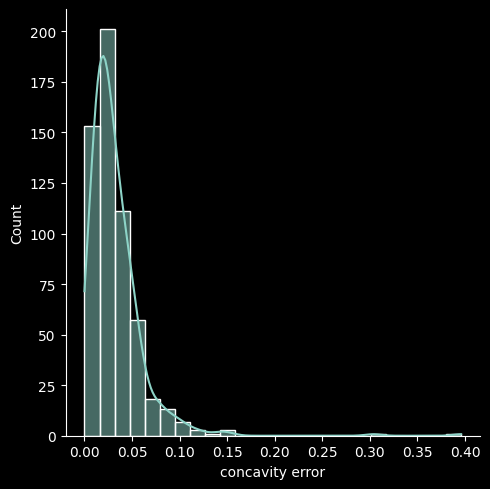

In [ ]:
#Using seaborn distribution plot
sns.displot(bc_df['concavity error'],kde=True,bins=25)
plt.show()

**log transformation to remove skewness**

In [ ]:
bc_df['concavity error']= np.log10(bc_df['concavity error'])
bc_df['concavity error']

0     -1.269783
1     -1.730487
2     -1.416574
3     -1.247107
4     -1.245040
         ...   
564   -1.284164
565   -1.403403
566   -1.325139
567   -1.147703
568        -inf
Name: concavity error, Length: 569, dtype: float64

**Checking the Skewness after log transforamtion**

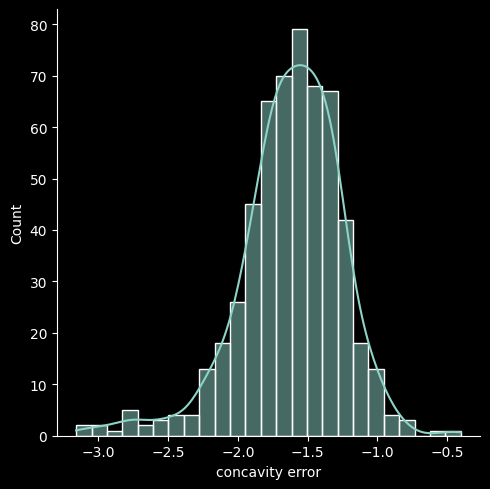

In [ ]:
#Using seaborn distribution plot
sns.displot(bc_df['concavity error'],kde=True,bins=25)
plt.show()

# <font color=Orange>**Data Splitting**</center></font>

**Split our data into training and testing sets:**

In [ ]:
from sklearn.model_selection import train_test_split
X = feature_df.copy()
y_series = data['target'] #series

# Convert the Series to a DataFrame
y = pd.DataFrame(y_series, columns=['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

**Checking the shape of train and test data**

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(381, 30)
(381, 1)
(188, 30)
(188, 1)


In [ ]:
#numeric columns
num_col=[]
for i in bc_df.columns:
    if bc_df[i].dtype=='float64':
        num_col.append(i)

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler


# apply standardization on numerical features
for i in num_col:

    # fit on training data column
    scale = StandardScaler().fit(X_train[[i]])

    # transform the training data column
    X_train[i] = scale.transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

**Train data : after Standardization**

In [ ]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
351,0.476371,-0.003595,0.636899,0.303663,2.035680,2.499515,2.511070,1.956733,2.169877,1.830947,...,0.239302,-0.232616,0.380296,0.068156,1.015383,1.650275,2.021514,1.521679,2.245992,1.230169
214,0.044078,1.053030,0.064367,-0.105184,-0.091750,0.524331,0.292556,0.430393,1.644082,0.221014,...,0.138411,1.536971,0.251421,-0.109487,1.055192,1.013981,0.516584,0.976401,3.030640,1.092448
311,0.160464,-0.816206,0.056723,0.044644,-1.414671,-1.257629,-0.904010,-0.744207,-0.620594,-1.399927,...,0.057699,-0.633590,-0.079552,-0.059098,-1.368751,-1.145873,-1.056375,-0.812202,-0.563342,-1.527106
211,-0.607132,-0.068051,-0.634098,-0.610229,-0.516232,-0.625682,-0.753314,-0.868200,-0.992407,-0.296366,...,-0.579933,-0.096749,-0.620825,-0.562133,-0.178896,-0.390766,-0.576992,-0.646966,-0.555151,-0.208434
417,0.407093,0.424580,0.467916,0.426676,1.153733,1.019061,0.794466,0.947627,1.080730,0.814075,...,1.411656,0.343991,1.484516,1.490491,0.869415,0.977234,0.741265,1.520177,0.211478,1.218692


# **Hypothesis testing in python**

**P-Value Approach:**

If the p-value (probability value) associated with the test statistic is less than or equal to the chosen level of significance (alpha), then you reject the null hypothesis.
A smaller p-value indicates stronger evidence against the null hypothesis.

In [ ]:
import statsmodels.api as sm
#To create a fitted model, I have used Ordinary least squares

lr = sm.OLS(y_train, X_train).fit()
#Once we have trained the model, we can see the summary of the tests using the command

print(lr.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.282
Model:                            OLS   Adj. R-squared (uncentered):              0.221
Method:                 Least Squares   F-statistic:                              4.605
Date:                Fri, 01 Mar 2024   Prob (F-statistic):                    6.98e-13
Time:                        06:35:48   Log-Likelihood:                         -394.82
No. Observations:                 381   AIC:                                      849.6
Df Residuals:                     351   BIC:                                      967.9
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

# H0: mean radius is same across different diagnosis
Test if there is a significant difference in diagnosis between different mean radius values.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(bc_df['mean radius'], bc_df['diagnosis'])
print(contingency_table)
# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


diagnosis    0  1
mean radius      
6.981        0  1
7.691        0  1
7.729        0  1
7.760        0  1
8.196        0  1
...         .. ..
25.220       1  0
25.730       1  0
27.220       1  0
27.420       1  0
28.110       1  0

[456 rows x 2 columns]
Chi-squared Statistic: 513.7450859274528
P-value: 0.029296084732760866
Reject the null hypothesis. There is a significant relationship.


# H0: worst radius is same across different diagnosis
Test if there is a significant difference in diagnosis between different worst radius values.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(bc_df['worst radius'], bc_df['diagnosis'])
print(contingency_table)
# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


diagnosis     0  1
worst radius      
7.930         0  1
8.678         0  1
8.952         0  1
8.964         0  1
9.077         0  1
...          .. ..
31.010        1  0
32.490        1  0
33.120        1  0
33.130        1  0
36.040        1  0

[457 rows x 2 columns]
Chi-squared Statistic: 537.629468139457
P-value: 0.0049616262938718065
Reject the null hypothesis. There is a significant relationship.


# H0: mean fractal dimension is same across different diagnosis
Test if there is a significant difference in diagnosis between different mean fractal dimension.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(bc_df['mean fractal dimension'], bc_df['diagnosis'])
print(contingency_table)
# Perform chi-squared test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f'Chi-squared Statistic: {chi2_stat}')
print(f'P-value: {p_value}')

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship.")


diagnosis               0  1
mean fractal dimension      
0.04996                 1  0
0.05024                 1  0
0.05025                 1  0
0.05044                 1  0
0.05054                 1  0
...                    .. ..
0.08980                 0  1
0.09296                 0  1
0.09502                 0  1
0.09575                 0  1
0.09744                 1  0

[499 rows x 2 columns]
Chi-squared Statistic: 498.4163033137783
P-value: 0.48631413368882737
Fail to reject the null hypothesis. There is no significant relationship.


# <font color=Orange>**Modelling**</center></font>

# **Model : XG Boosting**

- [x] __[xgboost](https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/)__


XGBoost, or eXtreme Gradient Boosting, is a machine learning algorithm under ensemble learning.
It is trendy for supervised learning tasks, such as regression and classification.
XGBoost builds a predictive model by combining the predictions of multiple individual models,
often decision trees, in an iterative manner.


XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

**** ACCURACY_SCORE **** 

 0.9840425531914894 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98        69
           1       0.99      0.98      0.99       119

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188
 

**** CONFUSION MATRIX ****


<Axes: >

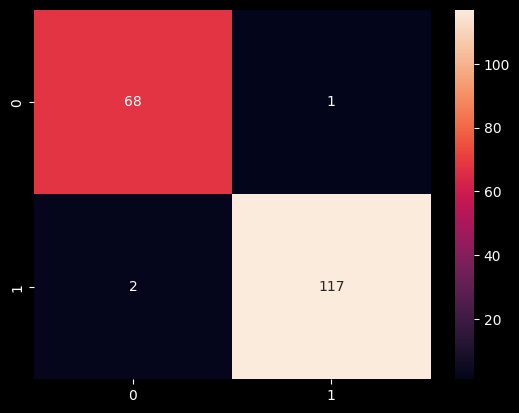

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_gb = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# **Model : XGB with Hyper parameter Tuning**

XGBClassifier has numerous hyperparameters, each controlling different aspects of the model's learning process. Choosing the right values is crucial for maximizing performance and avoiding common pitfalls like overfitting and underfitting.

Train accuracy: 1.0
Test accuracy: 0.9893617021276596
**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.93      0.94      0.94        69
           1       0.97      0.96      0.96       119

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188
 

**** CONFUSION MATRIX ****


<Axes: >

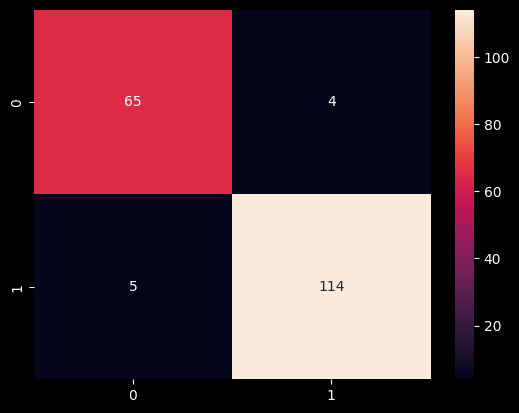

In [ ]:

model = XGBClassifier(max_depth =4,
                      subsample = 0.8,
                      n_estimators =400,
                      learning_rate = 0.05,
                      min_child_weight = 1,
                      random_state = 10,
                      reg_alpha = 0,
                      reg_lambda = 1
                     )
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
y_train_predict = model.predict(X_train)

from sklearn.metrics import accuracy_score, classification_report

print("Train accuracy:", accuracy_score(y_train,y_train_predict))
print("Test accuracy:", accuracy_score(y_test,y_predict))
XGB_Hyperparameter_accuracy = accuracy_score(y_test,y_predict)

print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# **Model : SVM  (Support Vector Machines)**




- [x] __[support-vector-machines-svm](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners//)__


A support vector machine (SVM) is a powerful and versatile machine learning model, capable of performing linear or nonlinear classification, regression, and even novelty detection. SVMs shine with small to medium-sized nonlinear datasets (i.e., hundreds to thousands of instances), especially for classification tasks.

Features of the data points are often mapped to a high-dimensional space using techniques like kernel functions to enable better separation in complex situations.  An algorithm iteratively adjusts the hyperplane's position and orientation to maximize the margin between the classes based on the support vectors.New data points are projected into the same high-dimensional space, and their class is predicted based on which side of the hyperplane they fall on.

**** ACCURACY_SCORE **** 

 0.9202127659574468 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.97      0.81      0.88        69
           1       0.90      0.98      0.94       119

    accuracy                           0.92       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188
 

**** CONFUSION MATRIX ****


<Axes: >

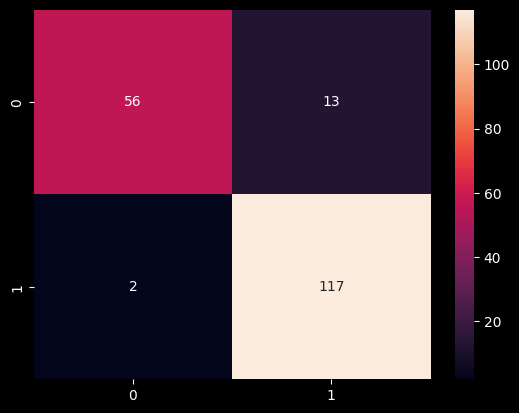

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_svm =accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# **Model: SVM - Hyperparameter Tuned**

Best hyperparameters: {'C': 10}
Best score : 0.9238591269841271
**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.95      0.84      0.89        69
           1       0.91      0.97      0.94       119

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188
 

**** CONFUSION MATRIX ****


<Axes: >

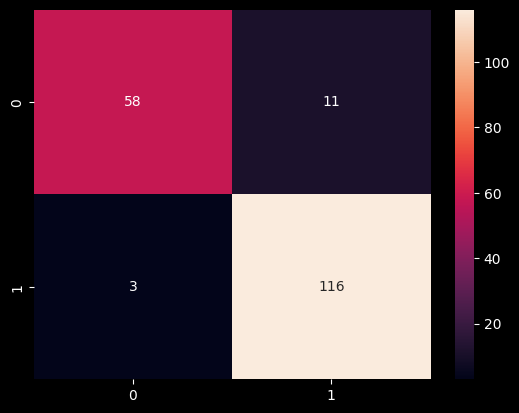

In [ ]:
from sklearn.model_selection import GridSearchCV
# Regularization parameter
param_grid = {'C': [0.1, 1, 10]}

grid_search = GridSearchCV(estimator=SVC(), param_grid=param_grid, cv=6)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score_SVM_hypertuned = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best score :", best_score_SVM_hypertuned)
y_pred = best_model.predict(X_test)

print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# **Model : Random Forest**

**A Random Forest** is like a group decision-making team in machine learning. It combines the opinions of many “trees” (individual models) to make better predictions, creating a more robust and accurate overall model.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks.



- [x] __[Random Forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)__

**** ACCURACY_SCORE **** 

 0.9627659574468085 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.97      0.97      0.97       119

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188
 

**** CONFUSION MATRIX ****


<Axes: >

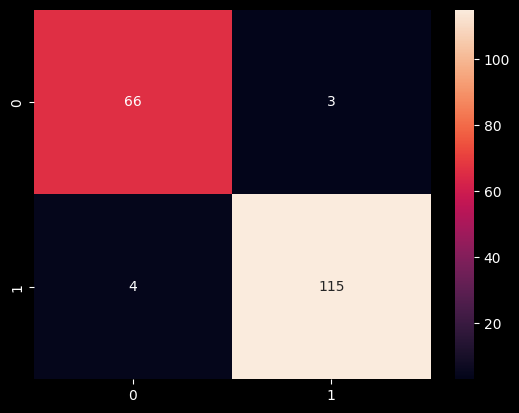

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_rf = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')

# **Model : KNN**

The K-Nearest Neighbors (KNN) algorithm is a popular machine learning technique used for classification and regression tasks. It relies on the idea that similar data points tend to have similar labels or values.

During the training phase, the KNN algorithm stores the entire training dataset as a reference. When making predictions, it calculates the distance between the input data point and all the training examples, using a chosen distance metric such as Euclidean distance.

Next, the algorithm identifies the K nearest neighbors to the input data point based on their distances. In the case of classification, the algorithm assigns the most common class label among the K neighbors as the predicted label for the input data point. For regression, it calculates the average or weighted average of the target values of the K neighbors to predict the value for the input data point.

**** ACCURACY_SCORE **** 

 0.9468085106382979 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.94      0.91      0.93        69
           1       0.95      0.97      0.96       119

    accuracy                           0.95       188
   macro avg       0.95      0.94      0.94       188
weighted avg       0.95      0.95      0.95       188
 

**** CONFUSION MATRIX ****


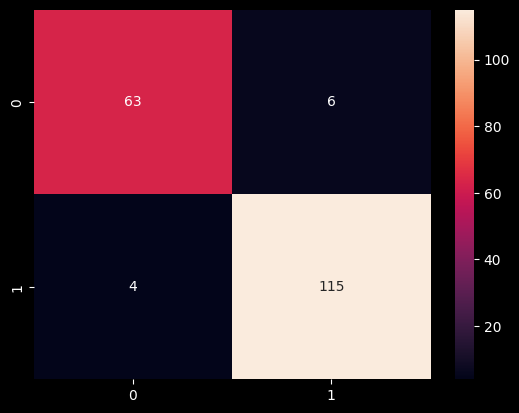

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create and fit the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_classifier.fit(X_train, y_train)

#  Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

#  Evaluate the model
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_knn = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()


# **Model:Logistic Regresion**

**** ACCURACY_SCORE **** 

 0.9521276595744681 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.93      0.94      0.94        69
           1       0.97      0.96      0.96       119

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188
 

**** CONFUSION MATRIX ****


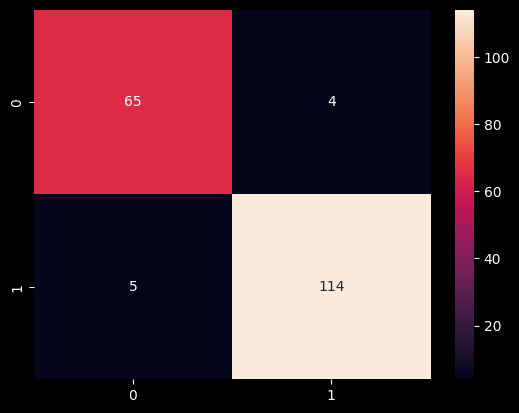

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_squared_error,r2_score
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)
y_pred = classifier_lr.predict(X_test)

#  Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred)
print('**** ACCURACY_SCORE **** \n\n',accuracy_log_reg, '\n')
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

# **Model : Decision Tree**

A Decision tree is a tree-like structure that represents a set of decisions and their possible consequences.
Each node in the tree represents a decision, and each branch represents an outcome of that decision.
The leaves of the tree represent the final decisions or predictions.

Decision trees are created by recursively partitioning the data into smaller and smaller subsets.
At each partition, the data is split based on a specific feature,
and the split is made in a way that maximizes the information gain.

**Cost Complexity Pruning (CCP)           -   hyperparameter tuning technique in decision tree**

This is a technique used in decision tree models to control their complexity and prevent overfitting.
It involves removing branches that contribute less to the model's performance.


CCP introduces a cost complexity parameter (ccp_alpha).
This parameter determines the minimum improvement in cost function required for a node split to be kept in the tree.

Lower ccp_alpha -  Allows the tree to grow deeper - leading to overfitting

Higher ccp_alpha - Forces the model to prune more branches - reduce overfitting

To find the best ccp_alpha, we can use either
 1. Grid Search or
 2. Randomized Search

 to find the optimal combination of hyperparameter values that results in the best performance for a model.

In [ ]:
# Grid Searchfor finding the best ccp_alpha value

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
#This set of values covers a diverse range of ccp_alpha possibilities from 0.0 (no pruning) to 10.0 (extensive pruning).
#This allows the Grid Search to explore the impact of different levels of pruning on the model's performance
param_grid = {'ccp_alpha': [0.0, 0.01, 0.1, 1.0, 10.0]}

#decision tree model
model = DecisionTreeClassifier()

# Using Grid Search to find the best ccp_alpha
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# to get the best performing model identified by the Grid Search
#grid_search -  This is the GridSearchCV object
#.best_estimator_ - attribute of the GridSearchCV object that holds the model instance with the best performance
#based on the chosen scoring metric
best_model = grid_search.best_estimator_
best_ccp_alpha = grid_search.best_params_['ccp_alpha']

# calculates the performance of the best model identified by Grid Search on the unseen test set
test_score = best_model.score(X_test, y_test)

print("Best CCP Alpha:",best_ccp_alpha)
print("Test Score: ",test_score)

Best CCP Alpha: 0.01
Test Score:  0.9308510638297872


**Adjusting max_depth - hyperparameter tuning technique in decision tree**

In [ ]:
# First , import the Decision Tree Classifier model from the sklearn.tree module
# here fits the model to the training data

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=3)
clf = clf.fit(X_train, y_train)

In [ ]:
#  clf.get_params()  will return a Python dictionary containing all the parameters of  Decision Tree Classifier model
# The keys in the dictionary are the parameter names, and the corresponding values are the parameter values.


clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
#Decision Tree Classifier (clf) to make predictions on the test data (X_test).

predictions = clf.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [ ]:
# The predict_proba method in sklearn’s classifiers is used to predict class probabilities for the test data.
clf.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.9       , 0.1       ],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.98333333, 0.01666667],
       [0.04583333, 0.95416667],
       [0.98333333, 0.01666667],
       [0.

In [ ]:
#Compute the Accuracy of the model's prediction

from sklearn.metrics import accuracy_score
acc_decisiontree = accuracy_score(y_test, predictions)
acc_decisiontree

0.9202127659574468

**** CONFUSION MATRIX ****


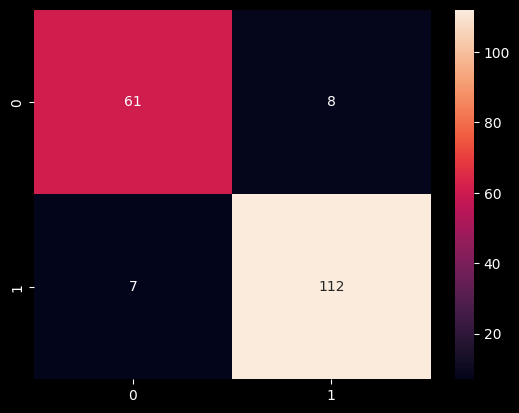

In [ ]:
# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d')
plt.show()

In [ ]:
# Precision Score

#    Precision = TP / (TP + FP)

from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.9333333333333333

In [ ]:
#Recall = TP / (TP+FN)

from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9411764705882353

In [ ]:
# To generate a report on the performance of the  model’s predictions.
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.90      0.88      0.89        69
      benign       0.93      0.94      0.94       119

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188



In [ ]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
#tells, how important each feature was in the decision-making process of the trained Decision Tree Classifier.
# The higher the number, the more important the feature.

clf.feature_importances_

array([0.        , 0.03590143, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03708931, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83480743, 0.        , 0.        ,
       0.        , 0.        , 0.09220184, 0.        , 0.        ])

In [ ]:
#This will print the feature importances in descending order

feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst perimeter,0.834807
worst concave points,0.092202
area error,0.037089
mean texture,0.035901
mean radius,0.000000
concavity error,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000


In [ ]:
#selecting only those features whose importance is greater than 0.

features = list(feature_importance[feature_importance[0]>0].index)
features

['worst perimeter', 'worst concave points', 'area error', 'mean texture']

<Axes: >

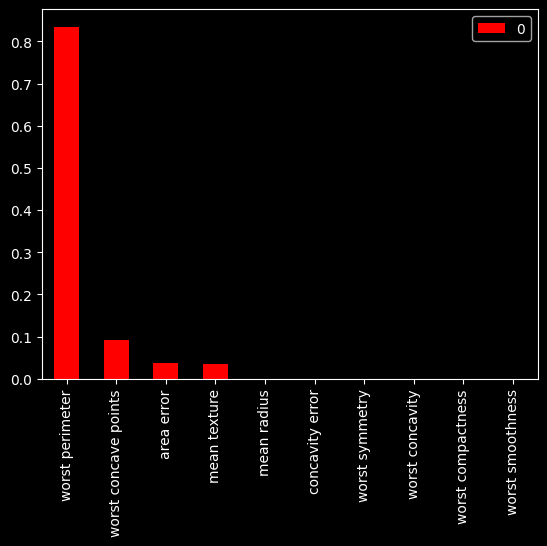

In [ ]:
feature_importance.head(10).plot(kind='bar',color='red')

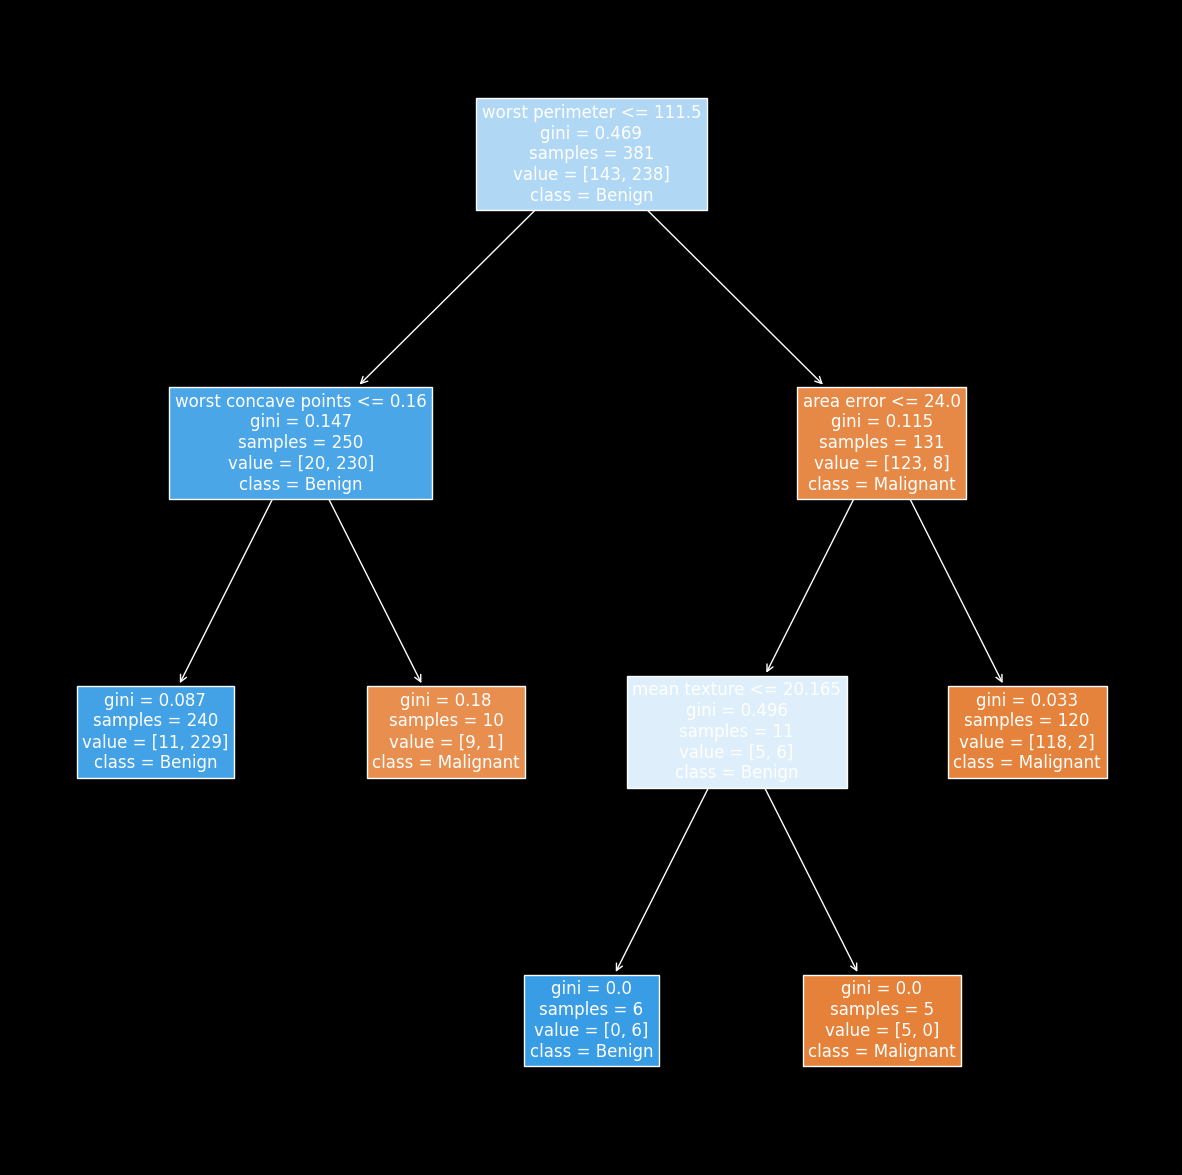

In [ ]:
#visualize trained decision tree classifier clf

from sklearn import tree
fig = plt.figure(figsize=(15,15))
_ = tree.plot_tree(clf,
                   feature_names=feature_names,
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)

# **Model: Hyperparameter Tuned Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg_tuned = RandomForestRegressor(n_estimators = 962, random_state = 42)
rf_reg_tuned.fit(X_train, y_train)
pred_rf_tuned = rf_reg_tuned.predict(X_test).round()

The Accuracy using tuned parameter for Random Forest Regression is 0.9680851063829787



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.94      0.97      0.96        69
           1       0.98      0.97      0.97       119

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188

**** CONFUSION MATRIX ****


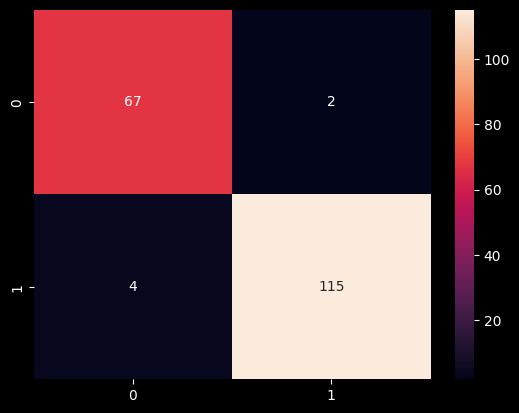

In [ ]:
accuracy_rf_tuned =accuracy_score(y_test, pred_rf_tuned)
print(f"The Accuracy using tuned parameter for Random Forest Regression is {accuracy_rf_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_rf_tuned))
# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, pred_rf_tuned), annot=True, fmt='d')
plt.show()

# **Model:Hyperparameter Tuned Gradeint Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg_tuned = GradientBoostingRegressor(n_estimators=98,learning_rate=0.1388888888888889,max_depth=8,random_state=42)
gb_reg_tuned.fit(X_train, y_train)
pred_gb_tuned= gb_reg_tuned.predict(X_test).round()

The Accuracy using tuned parameter for Gradient Boosting is 0.9361702127659575



Claasifiation Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        69
           1       0.97      0.93      0.95       119

    accuracy                           0.94       188
   macro avg       0.93      0.94      0.93       188
weighted avg       0.94      0.94      0.94       188

**** CONFUSION MATRIX ****


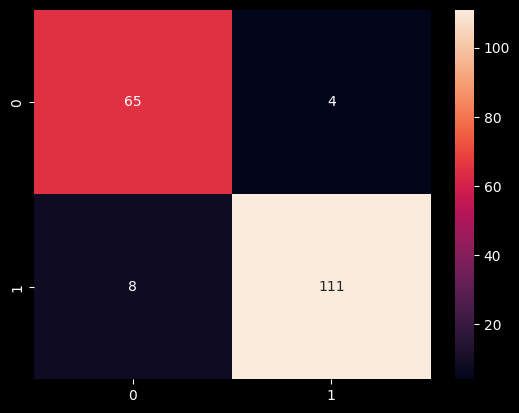

In [ ]:
accuracy_gb_tuned =accuracy_score(y_test, pred_gb_tuned)
print(f"The Accuracy using tuned parameter for Gradient Boosting is {accuracy_gb_tuned}\n")
print("\n\nClaasifiation Report:\n")
print(classification_report(y_test,pred_gb_tuned))
# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, pred_gb_tuned), annot=True, fmt='d')
plt.show()


## **Model: Gaussian Naive Bayes Classification:**

**** ACCURACY_SCORE **** 

 0.9414893617021277 

**** CLASSIFICATION_REPORT **** 

               precision    recall  f1-score   support

           0       0.91      0.93      0.92        69
           1       0.96      0.95      0.95       119

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188
 

**** CONFUSION MATRIX ****


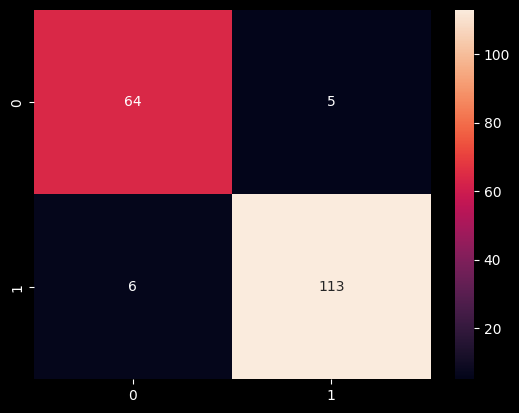

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create and fit the Gaussian Naive Bayes classifier
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier_nb.predict(X_test)

# Print accuracy score and classification report
print('**** ACCURACY_SCORE **** \n\n', accuracy_score(y_test, y_pred), '\n')
accuracy_nb  = accuracy_score(y_test, y_pred)
print('**** CLASSIFICATION_REPORT **** \n\n', classification_report(y_test, y_pred), '\n')

# Display the confusion matrix using Seaborn's heatmap
print('**** CONFUSION MATRIX ****')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

# <font color=Orange>**Best Model Analysis**</center></font>

In [ ]:
Results= pd.DataFrame(
    {
        'Algorithms': ['Random Forest','XGB','KNN','Tuned Random Forest','Tuned Gradient Boost Regressor','Hyperparameter Tuned Decision Tree','Hyperparameter Tuned XGB','Gaussian Naive Bayes','SVM','Hyperparameter Tuned SVM','Logistic Regression'],
        'Accuracy': [accuracy_rf,accuracy_gb,accuracy_knn,accuracy_rf_tuned,accuracy_gb_tuned,acc_decisiontree,XGB_Hyperparameter_accuracy,accuracy_nb,accuracy_svm,best_score_SVM_hypertuned,accuracy_log_reg]
    }
)
Results

,Algorithms,Accuracy
0,Random Forest,0.962766
1,XGB,0.984043
2,KNN,0.946809
3,Tuned Random Forest,0.968085
4,Tuned Gradient Boost Regressor,0.936170
5,Hyperparameter Tuned Decision Tree,0.925532
6,Hyperparameter Tuned XGB,0.989362
7,Gaussian Naive Bayes,0.941489
8,SVM,0.920213
9,Hyperparameter Tuned SVM,0.923859


# <font color=Orange>**Conclusion**</center></font>

**Conclusion : Best Fit Model for Predicting the breast cancer dataset is XGB algorithm**

# <font color=Orange>**Reference**</center></font>

- [x] __[Python package for dataset imports from UCI ML Repository](https://github.com/uci-ml-repo/ucimlrepo/tree/main)__

- [x] __[Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)__

- [x] __[Data cleansing with python](https://medium.com/@rmadhu2131/data-cleansing-with-python-c1dbcd53467f)__


- [x] __[Machine Learning Techniques](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)__

- [x] __[Supervised VS Unsupervised Learning](https://www.v7labs.com/blog/supervised-vs-unsupervised-learning)__



- [x] __[Classification vs Regression](https://www.springboard.com/blog/data-science/regression-vs-classification/)__

- [x] __[Classification vs Regression](https://medium.com/@dhanushv/regression-vs-classification-e128ba5c5d69)__

- [x] __[analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2020/10/12-powerful-tips-ace-data-science-hackathons/)__






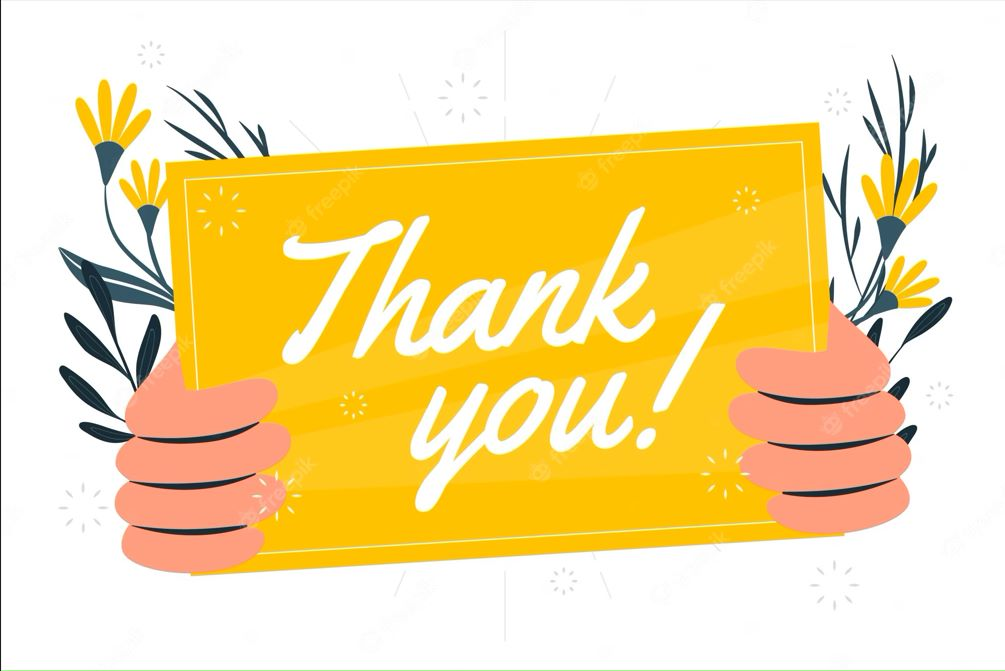